## Get Images and Format to .nii.gz

In [1]:
import os
os.chdir("/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/Pipeline-for-Morphology-Labeling")
from Main.GetImage import *
from Main.DataAugmentation import *
import glob
import json
import numpy as np

### Get Info

In [ ]:
datasets_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/"

datasets_list = glob.glob(f"{datasets_path}/*/")
# Print datasets names
print("Datasets:")
for ds in datasets_list:
    print(os.path.relpath(ds))

In [ ]:
# Get images data and metadata
dataset = "Dataset005_AugmentedII__DAPI_GFAP"

dataset_folder = f"{datasets_path}{dataset}"
originals_folder = f"{dataset_folder}/originals"

print(glob.glob(f"{originals_folder}/*.tif"))

for image_path in glob.glob(f"{originals_folder}/*.tif"):
    print(f"Start {image_path}")
    image, metadata = image_from_file(image_path)
    
    print(metadata)

### Crop

In [3]:
datasets_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datasets_segmentation/"

datasets_list = glob.glob(f"{datasets_path}/*/")
# Print datasets names
print("Datasets:")
for ds in datasets_list:
    print(os.path.relpath(ds))

Datasets:
../datasets_segmentation/E32ActinGFP7DIV__DAPI_GFP_SOX9_GFAP
../datasets_segmentation/E4WT7DIV__DAPI_SOX9_GFAP
../datasets_segmentation/E3ActinGFP7DIV__DAPI_GFP_SOX9_GFAP
../datasets_segmentation/Introduction__GFAP_DAPI
../datasets_segmentation/KathiHumanCells__Marker1_Marker2_Marker3_DAPI
../datasets_segmentation/ThomasADLH1L1__DAPI_GFAP
../datasets_segmentation/E2WT24H__Hoechst_CalceinAM_PI
../datasets_segmentation/E1WT7DIV__GFAP_SOX9_GFP_DAPI


In [4]:
dataset = "E32ActinGFP7DIV__DAPI_GFP_SOX9_GFAP"
unet_shape = (512,512)

dataset_folder = f"{datasets_path}{dataset}"
originals_folder = f"{dataset_folder}/originals"

nnUNet_training_shape = {'X': unet_shape[0], 
                         'Y': unet_shape[1]}

dataset_json_path = f"{dataset_folder}/dataset.json"

with open(dataset_json_path) as file:
    dataset_json = json.load(file)

for image_path in glob.glob(f"{originals_folder}/*"):
    image, metadata= image_from_file(image_path)

    shape = metadata['shape']

    crops = [[]]

    boxesX = np.ceil(int(shape['X'])/nnUNet_training_shape['X'])
    boxesY = np.ceil(int(shape['Y'])/nnUNet_training_shape['Y'])

    print(boxesX, boxesY)

    if boxesX > 1:
        overlapX = np.int64(boxesX*nnUNet_training_shape['X']-int(shape['X']))/(boxesX-1)
    else: 
        overlapX = 0

    if boxesY > 1:
        overlapY = np.int64(boxesY*nnUNet_training_shape['Y']-int(shape['Y']))/(boxesY-1)
    else: 
        overlapY = 0

    for boxX in np.arange(boxesX):
        for boxY in np.arange(boxesY):
            crop = {'X': [int(0 + boxX*(nnUNet_training_shape['X'] - overlapX)), 
                            int(nnUNet_training_shape['X'] + boxX*(nnUNet_training_shape['X'] - overlapX))],
                    'Y': [int(0 + boxY*(nnUNet_training_shape['Y'] - overlapY)), 
                            int(nnUNet_training_shape['Y'] + boxY*(nnUNet_training_shape['Y'] - overlapY))]}
                                
            # for channel in np.arange(int(shape['C'])):
            new_image_name = f"{image_path.split('.')[0]}_{str(int(boxX))}{str(int(boxY))}.nii.gz"
            cropped_image, metadata_cropped = cropImage(image, metadata, crop, f"{dataset_folder}/originals cropped/{os.path.basename(new_image_name)}", True)              

Start get data
Start get metadata
{'scale': [0.7575757575757576, 0.7575757575757576, 2.00143], 'dimensions': ['C', 'Z', 'X', 'Y'], 'shape': {'Z': 41, 'C': 4, 'Y': 1024, 'X': 1024}, 'markers': ['DAPI', 'GFP', 'SOX9', 'GFAP']}
2.0 2.0
Start get data
Start get metadata
{'scale': [0.7575757575757576, 0.7575757575757576, 2.00143], 'dimensions': ['C', 'Z', 'X', 'Y'], 'shape': {'Z': 41, 'C': 4, 'Y': 1024, 'X': 1024}, 'markers': ['DAPI', 'GFP', 'SOX9', 'GFAP']}
2.0 2.0
Start get data
Start get metadata
{'scale': [0.7575757575757576, 0.7575757575757576, 2.00143], 'dimensions': ['C', 'Z', 'X', 'Y'], 'shape': {'Z': 41, 'C': 4, 'Y': 1024, 'X': 1024}, 'markers': ['DAPI', 'GFP', 'SOX9', 'GFAP']}
2.0 2.0
Start get data
Start get metadata
{'scale': [0.7575757575757576, 0.7575757575757576, 2.00143], 'dimensions': ['C', 'Z', 'X', 'Y'], 'shape': {'Z': 41, 'C': 4, 'Y': 1024, 'X': 1024}, 'markers': ['DAPI', 'GFP', 'SOX9', 'GFAP']}
2.0 2.0
Start get data
Start get metadata
{'scale': [0.7575757575757576, 0.7

### Resize

In [ ]:
datasets_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/"

datasets_list = glob.glob(f"{datasets_path}/*/")
# Print datasets names
print("Datasets:")
for ds in datasets_list:
    print(os.path.relpath(ds))

In [ ]:
dataset = "Dataset005_AugmentedII__DAPI_GFAP"
unet_shape = (512,512)

dataset_folder = f"{datasets_path}{dataset}"
originals_folder = f"{dataset_folder}/originals"

nnUNet_training_shape = {'X': unet_shape[0], 
                         'Y': unet_shape[1]}
        
dataset_json_path = f"{dataset_folder}/dataset.json"

with open(dataset_json_path) as file:
    dataset_json = json.load(file)

for original_image in glob.glob(f"{originals_folder}/*"):
    image, metadata = image_from_file(original_image)
    new_image_name = f"{original_image.split('.')[0]}.nii.gz"
    resized_image, metadata_resized = resizeImage(image, metadata, (512, 512), f"{dataset_folder}/originals resized/{os.path.basename(new_image_name)}", True)

### Save as .nii.gz

In [ ]:
datasets_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/"

datasets_list = glob.glob(f"{datasets_path}/*/")
# Print datasets names
print("Datasets:")
for ds in datasets_list:
    print(os.path.relpath(ds))

In [ ]:
dataset = "Dataset005_AugmentedII__DAPI_GFAP"

dataset_folder = f"{datasets_path}{dataset}"
folder = f"{dataset_folder}/originals/labels"

dataset_json_path = f"{dataset_folder}/dataset.json"

with open(dataset_json_path) as file:
    dataset_json = json.load(file)

for original_image in glob.glob(f"{folder}/*"):
    image, metadata = image_from_file(original_image)

    print(image, metadata)

    print(type(image))

    new_image_name = f"{original_image.split('.')[0]}.nii.gz"
    saveNifti(image=image,
              metadata=metadata,
              output_path=f"{dataset_folder}/nnunet/labels/{os.path.basename(new_image_name)}")

### nnUNet Input

In [2]:
# datasets_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/"
datasets_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datasets_segmentation/"
# datasets_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/data/"

datasets_list = glob.glob(f"{datasets_path}/*/")
# Print datasets names
print("Datasets:")
for ds in datasets_list:
    print(os.path.relpath(ds))

Datasets:
../datasets_segmentation/E4WT7DIV__DAPI_SOX9_GFAP
../datasets_segmentation/E3ActinGFP7DIV__DAPI_GFP_SOX9_GFAP
../datasets_segmentation/EmbryoDaniela__GFP_FOXJ1_GFAP_DAPI
../datasets_segmentation/Merle__GFP_SOX9_NeuN_DAPI
../datasets_segmentation/CortexMaroussia__Marker1_GFP_DAPI_SA
../datasets_segmentation/Introduction__GFAP_DAPI
../datasets_segmentation/KathiHumanCells__Marker1_Marker2_Marker3_DAPI
../datasets_segmentation/ThomasADLH1L1__DAPI_GFAP
../datasets_segmentation/E2WT24H__Hoechst_CalceinAM_PI
../datasets_segmentation/E1WT7DIV__GFAP_SOX9_GFP_DAPI


In [3]:
## Format data as input for nnUNet
dataset = "E3ActinGFP7DIV__DAPI_GFP_SOX9_GFAP"
unet_shape = (512,512)

dataset_folder = f"{datasets_path}{dataset}"
originals_folder = f"{dataset_folder}/originals"

nnUNet_training_shape = {'X': unet_shape[0], 
                         'Y': unet_shape[1]}

dataset_json_path = f"{dataset_folder}/dataset.json"

with open(dataset_json_path) as file:
    dataset_json = json.load(file)

for original_image in glob.glob(f"{originals_folder}/*.tif"):
    image, metadata = image_from_file(original_image)
    shape = metadata['shape']

    for channel, marker in dataset_json['channel_names'].items():
        new_image_name = f"{original_image.split('.')[0]}_000{channel}.nii.gz"

        resized_image, metadata_resized = resizeImage(image, metadata,
                                                      (nnUNet_training_shape['X'], nnUNet_training_shape['Y']), 
                                                      f"{dataset_folder}/originals/{os.path.basename(new_image_name)}", 
                                                      False)

        final_image = channelImage(resized_image, metadata_resized,
                                   marker,
                                   f"{dataset_folder}/nnunet/{os.path.basename(new_image_name)}", 
                                   True)

Start get data
Start get metadata
{'scale': [0.7575757575757576, 0.7575757575757576, 2.00143], 'dimensions': ['C', 'Z', 'X', 'Y'], 'shape': {'Z': 41, 'C': 4, 'Y': 1024, 'X': 1024}, 'markers': ['DAPI', 'GFP', 'SOX9', 'GFAP']}
['DAPI', 'GFP', 'SOX9', 'GFAP'] DAPI
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFP
['DAPI', 'GFP', 'SOX9', 'GFAP'] SOX9
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFAP
Start get data
Start get metadata
{'scale': [0.7575757575757576, 0.7575757575757576, 2.00143], 'dimensions': ['C', 'Z', 'X', 'Y'], 'shape': {'Z': 41, 'C': 4, 'Y': 1024, 'X': 1024}, 'markers': ['DAPI', 'GFP', 'SOX9', 'GFAP']}
['DAPI', 'GFP', 'SOX9', 'GFAP'] DAPI
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFP
['DAPI', 'GFP', 'SOX9', 'GFAP'] SOX9
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFAP
Start get data
Start get metadata
{'scale': [0.7575757575757576, 0.7575757575757576, 2.00143], 'dimensions': ['C', 'Z', 'X', 'Y'], 'shape': {'Z': 41, 'C': 4, 'Y': 1024, 'X': 1024}, 'markers': ['DAPI', 'GFP', 'SOX9', 'GFAP']}
['DAPI', 'GFP', 'SOX9', 'GFAP']

### UNet Crop

In [8]:
# datasets_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/"
datasets_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datasets_segmentation/"

datasets_list = glob.glob(f"{datasets_path}/*/")
# Print datasets names
print("Datasets:")
for ds in datasets_list:
    print(os.path.relpath(ds))

Datasets:
../datasets_segmentation/E32ActinGFP7DIV__DAPI_GFP_SOX9_GFAP
../datasets_segmentation/E4WT7DIV__DAPI_SOX9_GFAP
../datasets_segmentation/E3ActinGFP7DIV__DAPI_GFP_SOX9_GFAP
../datasets_segmentation/Introduction__GFAP_DAPI
../datasets_segmentation/KathiHumanCells__Marker1_Marker2_Marker3_DAPI
../datasets_segmentation/ThomasADLH1L1__DAPI_GFAP
../datasets_segmentation/E2WT24H__Hoechst_CalceinAM_PI
../datasets_segmentation/E1WT7DIV__GFAP_SOX9_GFP_DAPI


In [9]:
## Format data as input for nnUNet after cropping to 512x512
dataset = "E32ActinGFP7DIV__DAPI_GFP_SOX9_GFAP"
unet_shape = (512,512)

dataset_folder = f"{datasets_path}{dataset}"
originals_folder = f"{dataset_folder}/originals"

nnUNet_training_shape = {'X': unet_shape[0], 
                         'Y': unet_shape[1]}
        
dataset_json_path = f"{dataset_folder}/dataset.json"

with open(dataset_json_path) as file:
    dataset_json = json.load(file)

for original_image in glob.glob(f"{originals_folder}/*"):
    print(original_image)
    image, metadata = image_from_file(original_image)

    shape = metadata['shape']

    crops = [[]]

    boxesX = np.ceil(int(shape['X'])/nnUNet_training_shape['X'])
    boxesY = np.ceil(int(shape['Y'])/nnUNet_training_shape['Y'])

    overlapX = np.int64(boxesX*nnUNet_training_shape['X']-int(shape['X']))/(boxesX-1)
    overlapY = np.int64(boxesY*nnUNet_training_shape['Y']-int(shape['Y']))/(boxesY-1)

    for boxX in np.arange(boxesX):
        for boxY in np.arange(boxesY):
            crop = {'X': [int(0 + boxX*(nnUNet_training_shape['X'] - overlapX)), 
                            int(nnUNet_training_shape['X'] + boxX*(nnUNet_training_shape['X'] - overlapX))],
                    'Y': [int(0 + boxY*(nnUNet_training_shape['Y'] - overlapY)), 
                            int(nnUNet_training_shape['Y'] + boxY*(nnUNet_training_shape['Y'] - overlapY))]}
                                
            # for channel in np.arange(int(shape['C'])):
            new_image_name_1 = f"{original_image.split('.')[0]}_{str(int(boxX))}{str(int(boxY))}.nii.gz"
            cropped_image, metadata_cropped = cropImage(image, metadata,
                                                        crop, 
                                                        f"{dataset_folder}/originals cropped/{os.path.basename(new_image_name_1)}", 
                                                        False)   

            for channel, marker in dataset_json['channel_names'].items():
                new_image_name = f"{new_image_name_1.split('.')[0]}_000{channel}.nii.gz"

                resized_image, metadata_resized = resizeImage(cropped_image, metadata_cropped,
                                                              (nnUNet_training_shape['X'], 
                                                               nnUNet_training_shape['Y']), 
                                                               f"{dataset_folder}/originals/{os.path.basename(new_image_name)}", 
                                                               False)

                final_image = channelImage(resized_image, metadata_resized,
                                           marker, 
                                           f"{dataset_folder}/nnunet cropped/{os.path.basename(new_image_name)}", 
                                           True)

/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datasets_segmentation/E32ActinGFP7DIV__DAPI_GFP_SOX9_GFAP/originals/E3 ActinGFP 7DIV N2 175mM P2.tif
Start get data
Start get metadata
{'scale': [0.7575757575757576, 0.7575757575757576, 2.00143], 'dimensions': ['C', 'Z', 'X', 'Y'], 'shape': {'Z': 41, 'C': 4, 'Y': 1024, 'X': 1024}, 'markers': ['DAPI', 'GFP', 'SOX9', 'GFAP']}
['DAPI', 'GFP', 'SOX9', 'GFAP'] DAPI
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFP
['DAPI', 'GFP', 'SOX9', 'GFAP'] SOX9
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFAP
['DAPI', 'GFP', 'SOX9', 'GFAP'] DAPI
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFP
['DAPI', 'GFP', 'SOX9', 'GFAP'] SOX9
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFAP
['DAPI', 'GFP', 'SOX9', 'GFAP'] DAPI
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFP
['DAPI', 'GFP', 'SOX9', 'GFAP'] SOX9
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFAP
['DAPI', 'GFP', 'SOX9', 'GFAP'] DAPI
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFP
['DAPI', 'GFP', 'SOX9', 'GFAP'] SOX9
['DAPI', 'GFP', 'SOX9', 'GFAP'] GFAP
/Users/Beatriz/Documents/Bioméd

## Augment Dataset

In [2]:
dataset_path="/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP"  
  
images_folder_512 = f"{dataset_path}/nnunet/512"
images_folder_1024 = f"{dataset_path}/nnunet/1024"
labels_folder_512 = f"{dataset_path}/nnunet/512/labels"
labels_folder_1024 = f"{dataset_path}/nnunet/1024/labels"
output_folder = f"{dataset_path}/augmented"

In [4]:
augmentation(images_folder_512, 
             labels_folder_512, 
             size_augmented_dataset=75, 
             probability=0.4,
             range_zoom=(0.5,2,0.05),
             output_folder=output_folder)

['/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/512/labels/AUGMENT005.nii.gz', '/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/512/labels/AUGMENT009.nii.gz', '/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/512/labels/AUGMENT017.nii.gz', '/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/512/labels/AUGMENT015.nii.gz', '/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/512/labels/AUGMENT007.nii.gz', '/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/512/labels/AUGMENT019.nii.gz', '/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/al

In [3]:
augmentation(images_folder_1024, 
             labels_folder_1024, 
             size_augmented_dataset=75, 
             probability=0.75,
             range_zoom=(0.5,2,0.05),
             output_folder=output_folder)

['/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/1024/labels/AUGMENT003.nii.gz', '/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/1024/labels/AUGMENT001.nii.gz', '/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/1024/labels/AUGMENT004.nii.gz', '/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/1024/labels/AUGMENT002.nii.gz']
dict_keys(['AUGMENT003', 'AUGMENT001', 'AUGMENT004', 'AUGMENT002'])
['AUGMENT003', 'AUGMENT001', 'AUGMENT004', 'AUGMENT002']
{'label': '/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/nnunet/1024/labels/AUGMENT003.nii.gz', 'images': ['/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorith

(512, 512, 101)

In [14]:
import matplotlib.pyplot as plt

image = getData("/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/datasets/E2WT24H__Hoechst_CalceinAM_PI/prediction/E2 WT 24H N1 5mM P1.nii.gz")
image.shape
# plt.imshow(image.sum(axis=2))

(512, 512, 41)

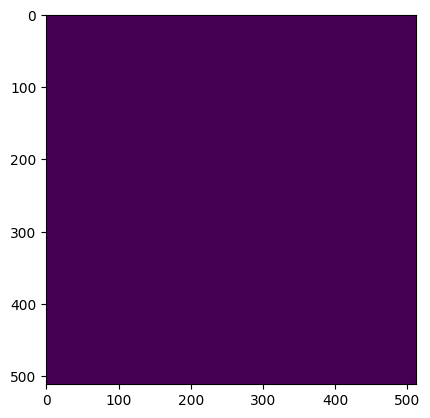

In [15]:
plt.imshow(image.sum(axis=2))

In [ ]:
plt.imshow(image.sum(axis=2))

## 

# Statistical Tests

In [55]:
import os
os.chdir("/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/Pipeline-for-Morphology-Labeling")
from Main.GetImage import *
from scipy.stats import shapiro
import glob

dataset_path = "/Users/Beatriz/Documents/Biomédica@IST/Mestrado/Tese/algorithms_segmentation/nnU-Net/nnUNet_raw/Dataset005_AugmentedII__DAPI_GFAP/augmented"
flat_images = []


for file in glob.glob(f'{dataset_path}/*0.nii.gz'):
    image, _ = image_from_file(file)

    print("grayscale")
    print(image.max(axis=2))
    print(image.max(axis=2).shape)
    # grayscale_image = cv2.cvtColor(image.max(axis=0), cv2.IMREAD_GRAYSCALE)

    print("flat")

    flat_images.append(image.flatten())

    

# Apply the Shapiro-Wilk test to each image
# results = [shapiro(image) for image in flat_images]

# for i, (stat, p_value) in enumerate(results):
#     print(f"Image {i+1}: Test Statistic = {stat}, p-value = {p_value}")

Start get data
Start get metadata
{'scale': None, 'dimensions': None, 'shape': None, 'markers': None}
grayscale
[[1.58049553e-132 4.34963996e-131 8.34377815e-130 ... 6.33291497e-130
  5.15616585e-131 8.37208525e-133]
 [5.44878223e-131 1.99760825e-115 2.80196273e-114 ... 2.20406652e-113
  1.57134904e-114 4.35489184e-131]
 [6.28878258e-130 2.80196273e-114 3.93019761e-113 ... 3.09155324e-112
  2.20406652e-113 5.80598843e-130]
 ...
 [1.77443592e-130 2.60845920e-113 3.65877819e-112 ... 1.83476458e-112
  1.30806196e-113 5.73965156e-130]
 [2.88268998e-131 1.85965343e-114 2.60845920e-113 ... 1.30806196e-113
  9.32558927e-115 2.81417620e-131]
 [7.42913202e-133 2.03806893e-131 3.01657839e-130 ... 4.67386012e-130
  2.92674418e-131 1.38190054e-133]]
(512, 512)
flat
Start get data
Start get metadata
{'scale': None, 'dimensions': None, 'shape': None, 'markers': None}
grayscale
[[1.62302704e-59 3.19314965e-58 8.52872935e-58 ... 6.32634758e-58
  1.25062153e-57 3.29793730e-58]
 [5.25111552e-58 3.650798

In [57]:
shapiro([image.std() for image in flat_images])

ShapiroResult(statistic=0.972303646470641, pvalue=0.003990226371593282)

In [14]:
[image.mean() for image in flat_images]

[83.05704402923584,
 76.50117588043213,
 76.27557277679443,
 76.53958511352539,
 88.92988586425781,
 82.40113735198975,
 79.25651550292969,
 108.11727333068848,
 101.7026309967041,
 81.06968593597412,
 86.91408634185791,
 76.63623332977295,
 73.9284553527832,
 94.88279056549072,
 106.30880355834961,
 77.63724517822266]

In [7]:
shapiro(flat_images)

/Users/Beatriz/anaconda3/envs/astroneudl/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16777216.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.6654435705520096, pvalue=1.0115404200076722e-200)

In [ ]:
shapiro(flat_images)

0.955 (0.580)                & 0.974 (0.903)        & 0.974 (0.903)       & 0.841 (4.97 e-10)                                                                & 0.972 (3.99e-3)

In [2]:
import pandas as pd

shapiro_mean = [0.973, 0.930, 0.930, 0.573, 0.939]
shapiro_p_mean = [0.886, 0.247, 0.247, 4.31e-17, 4.32e-5]

shapiro_std = [0.955, 0.974, 0.974, 0.841, 0.972]
shapiro_p_std = [0.580, 0.903, 0.903, 4.97e-10, 3.99e-3]

shapiro_Std = pd.DataFrame(columns=['Shapiro', ''], data = np.array([shapiro_std, shapiro_p_std]).transpose())

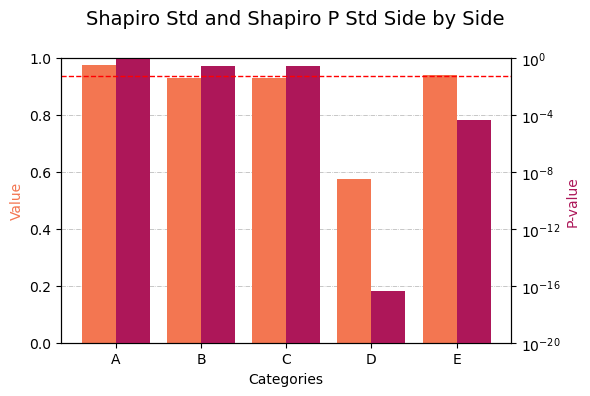

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

cool_sage = "#9CAF88"
soft_gold = "#D4AF37"
coral_rose = "#E76F51"
white = "#FFFFFF"
bars_palette = sns.color_palette("rocket")

heatmap_palette = sns.color_palette(sns.blend_palette([bars_palette[2], white, bars_palette[4]], n_colors=100))

# Data
shapiro_std = [0.955, 0.974, 0.974, 0.841, 0.972]
shapiro_p_std = [0.580, 0.903, 0.903, 4.97e-10, 3.99e-3]
categories = ["A", "B", "C", "D", "E"]  # Labels for x-axis

# Define x positions for bars
x_positions = np.arange(len(categories))

# Bar width
bar_width = 0.4

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()

# Plot bars for shapiro_std (Primary Axis)
bars1 = ax1.bar(x_positions - bar_width / 2, shapiro_mean, width=bar_width, color=bars_palette[4], label="Shapiro Std", zorder =2)

# Plot bars for shapiro_p_std (Secondary Axis)
bars2 = ax2.bar(x_positions + bar_width / 2, shapiro_p_mean, width=bar_width, color=bars_palette[2], label="Shapiro P Std (Log)", zorder =2)

# Set secondary y-axis to log scale
ax2.set_yscale("log")
ax2.set_ylim(1e-19, 1)

# Horizontal line for threshold
ax2.axhline(y=0.05, color='red', linestyle='--', linewidth=1, label="Threshold (0.05)")

# Adjust x-axis
ax1.set_xticks(x_positions)
ax1.set_xticklabels(categories)

# Add labels, title, and legend
ax1.set_ylabel("Value", color=bars_palette[4])
ax2.set_ylabel("P-value", color=bars_palette[2])
ax1.set_ylim(0, 1)
ax2.set_ylim(1e-20, 1)
ax2.set_yticks([1e-20, 1e-16, 1e-12, 1e-8, 1e-4, 1e0])
ax1.set_xlabel("Categories")
fig.suptitle("Shapiro Std and Shapiro P Std Side by Side", fontsize=14)

# Add legends for both axes
# ax1.legend(loc="upper left", bbox_to_anchor=(-0.3, 1))
# ax2.legend(loc="upper right", bbox_to_anchor=(-0.3, 1))

# custom_legend = [
#     Patch(facecolor=bars_palette[2], edgecolor=bars_palette[2], label='Shapiro statistic'),
#     Line2D([0], [0], label='0.05 p-value threshold', color='r', linestyle='--'),
#     Patch(facecolor=bars_palette[4], edgecolor=bars_palette[4], label='P-Value')
# ]
# plt.legend(handles=custom_legend, loc='upper right', fancybox=True, shadow=True, bbox_to_anchor=(1.5, 1))

# Gridlines for primary axis
ax1.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder =-1)
ax2.grid(False)

plt.tight_layout()
plt.savefig("Images/shapiro_mean.pdf", transparent=True)
plt.show()

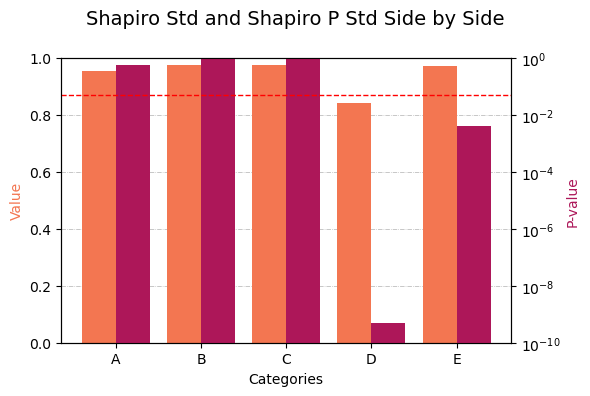

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

cool_sage = "#9CAF88"
soft_gold = "#D4AF37"
coral_rose = "#E76F51"
white = "#FFFFFF"
bars_palette = sns.color_palette("rocket")

heatmap_palette = sns.color_palette(sns.blend_palette([bars_palette[2], white, bars_palette[4]], n_colors=100))

# Data
shapiro_std = [0.955, 0.974, 0.974, 0.841, 0.972]
shapiro_p_std = [0.580, 0.903, 0.903, 4.97e-10, 3.99e-3]
categories = ["A", "B", "C", "D", "E"]  # Labels for x-axis

# Define x positions for bars
x_positions = np.arange(len(categories))

# Bar width
bar_width = 0.4

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()

# Plot bars for shapiro_std (Primary Axis)
bars1 = ax1.bar(x_positions - bar_width / 2, shapiro_std, width=bar_width, color=bars_palette[4], label="Shapiro Std", zorder =2)

# Plot bars for shapiro_p_std (Secondary Axis)
bars2 = ax2.bar(x_positions + bar_width / 2, shapiro_p_std, width=bar_width, color=bars_palette[2], label="Shapiro P Std (Log)", zorder =2)

# Set secondary y-axis to log scale
ax2.set_yscale("log")
ax2.set_ylim(1e-10, 1)

# Horizontal line for threshold
ax2.axhline(y=0.05, color='red', linestyle='--', linewidth=1, label="Threshold (0.05)")

# Adjust x-axis
ax1.set_xticks(x_positions)
ax1.set_xticklabels(categories)

# Add labels, title, and legend
ax1.set_ylabel("Value", color=bars_palette[4])
ax2.set_ylabel("P-value", color=bars_palette[2])
ax1.set_ylim(0, 1)
ax2.set_ylim(1e-10, 1)
ax2.set_yticks([1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0])
ax1.set_xlabel("Categories")
fig.suptitle("Shapiro Std and Shapiro P Std Side by Side", fontsize=14)

# Add legends for both axes
# ax1.legend(loc="upper left", bbox_to_anchor=(-0.3, 1))
# ax2.legend(loc="upper right", bbox_to_anchor=(-0.3, 1))

# custom_legend = [
#     Patch(facecolor=bars_palette[2], edgecolor=bars_palette[2], label='Shapiro statistic'),
#     Line2D([0], [0], label='0.05 p-value threshold', color='r', linestyle='--'),
#     Patch(facecolor=bars_palette[4], edgecolor=bars_palette[4], label='P-Value')
# ]
# plt.legend(handles=custom_legend, loc='upper right', fancybox=True, shadow=True, bbox_to_anchor=(1.5, 1))

# Gridlines for primary axis
ax1.grid(visible=True, which='both', axis='y', linestyle='-.', linewidth=0.5, zorder =-1)
ax2.grid(False)

plt.tight_layout()
plt.savefig("Images/shapiro_std.pdf", transparent=True)
plt.show()